# ICS 235 Homework Assignment 4
# <span style="color:red">Due: 12:00 PM on Monday, November 13</span>

## Instructions

1. Name your notebook file using your last and first name as presented in Laulima.
    - For example, Kay, Baek ==> baek_kay_4.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extensions. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
3. Data files will be available to the instructor, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
4. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
5. Do not create any subfolders in your Drop Box.
6. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission should show only the required outputs. 
7. Run your code before submission to **show all outputs**. 
8. Do not modify the provided code unless intructed to do so.
9. Write your full name in the cell below.
***

## Your Name: Michael Lee
***

# Exercise 1: Lossy image compression using PCA  (40 points)

In this assignment, we will use Principal Component Analysis (PCA) to compress an image. Contrary to the example with MNIST dataset we saw in class, we have a single picture to compress. It means that we have a single sample, and n_pixels features. This is a problem if we want to efficiently represent our data with PCA. Our approach will therefore consider our image as a samples by features matrix, where each row of the image is a sample and the columns are features. Note that we could have chosen equivalently to do the contrary (samples as columns and features as rows).

In this assignment, we will refer to the "original space" the space of image, and the "PCA space" the space of image after PCA decomposition. The approach we are taking in this homework is to represent our image in the PCA space with a limited number of components. We want to select the smallest number of components that will preserve the image quality.

## Loading the data

We first need to load the image. One of the most common Python packages to process image is called PIL (Python Imaging Library). You don't need to learn how to use it, we will simply use it at the very beginning to convert our image into a numpy array.

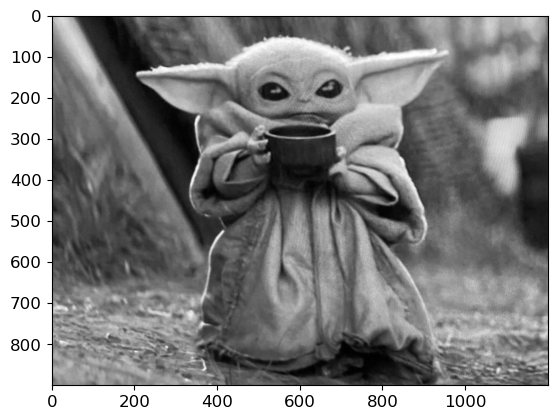

In [57]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/baby_yoda.jpeg", "r") # load the image
img = img.convert("L") # convert to grayscale

img_npy = np.array(img)

plt.imshow(img_npy, aspect="auto", cmap="gray")

1. 1. Run a Principal Components Analysis on the image with 50 components. (You don't need to scale the data.) (5 points)
   2. Display the explained variance in a plot, where the x-axis is the component ID and the y-axis is the **cumulative explained variance ratio** for the component. (5 points)
   3. How many components do you need to explain 90% of the data variance? 
   (For this question, you will need to write code to find the exact number, not manually by looking at the plot.) (5 points)

The number of components you need to expain 90% of the data is 17 components


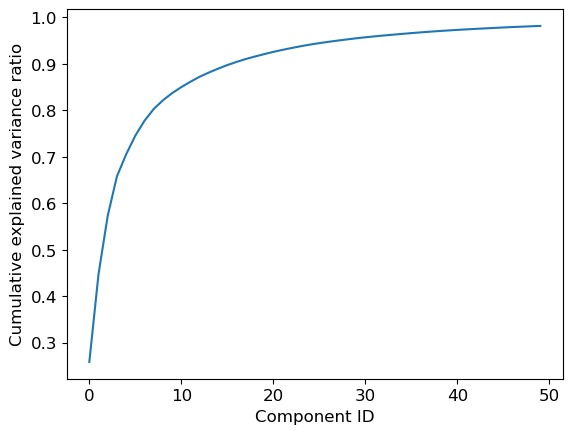

In [58]:
# Your code
plt.rcParams.update({'font.size': 12})
# 1.A
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(img_npy)

# 1.B
# Create a list of values from 0-50
componentID = np.arange(50)
# Find the cumulative explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot graph with labels
plt.plot(componentID, cumsum)
plt.xlabel("Component ID")
plt.ylabel("Cumulative explained variance ratio")

# 1.C
# Find where in the array that the cummulative sum is greater than 90%
componentsNeeded = np.argmax(cumsum >= .9) + 1
print("The number of components you need to expain 90%% of the data is %d components" % componentsNeeded)

2. 1. Compute the compressed image (its PCA representation). (3 points)
   2. How much did we compress the image? Compute the ratio between the size of the compressed image and the original image. (2 points)
   3. Show the inverse transform of the compressed image. (5 points)

The image was compressed to 1.42% of its original size


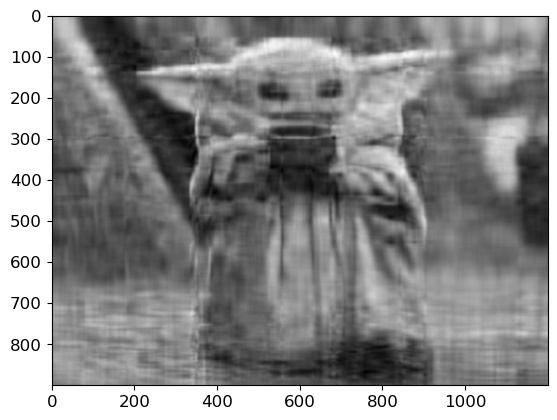

In [59]:
# Your code

# 2.A
pca_90 = PCA(n_components=componentsNeeded)
compressed_data = pca_90.fit_transform(img_npy)

# 2.B
# Calculate the change in size between the original and compressed image
print("The image was compressed to %.2f%% of its original size" % ((compressed_data.size/img_npy.size)*100))

# 2.C
# Reconstruct the image from the compressed data and display it
reconstructed_image = pca_90.inverse_transform(compressed_data)
plt.imshow(reconstructed_image, aspect="auto", cmap="gray")

3. We want to visually inspect the compressed images to fine-tune the number of components. Evaluate the impact of the number of components on image quality by plotting in a single plot the original image and the results of compression for a varying number of components from 5 to 40 with a step of 5. Make 3 x 3 subplots to show the nine images. (15 points)
    - Each subplot should represent an image reconstructed from the compressed one for a given number of components. 
    - Place the original image in the first subplot.
    - Set the title of each subplot indicating the number of components used as well as the compression ratio as you computed in Question 2.B above.

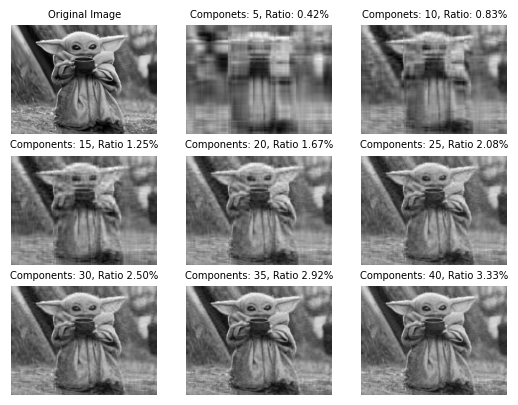

In [60]:
# Your code
# Decrease the font size so that we can see the titles for the subplot
plt.rcParams.update({'font.size': 6})
# Create a list that contains the number of components 
number_of_components = list(range(5, 41, 5))
# Create subplots to plot images
fig, axs = plt.subplots(3,3)
# Plot the original image
axs[0, 0].imshow(img_npy, aspect="auto", cmap="gray")
axs[0, 0].axis("off")
axs[0, 0].set_title("Original Image")
# Plot the remaining images
# Counter to keep track of the number of components
component_counter = 0
for rows in range(0, 3):
    if (rows == 0): # Special case for the first row since the first subplot is the original image
        for columns in range(1,3):
            # Create PCA with the correct number of components
            pca_subplot_1 = PCA(n_components=number_of_components[component_counter])
            # Compress data and reconstruct the image
            compressed_data_1 = pca_subplot_1.fit_transform(img_npy)
            reconstructed_image_1 = pca_subplot_1.inverse_transform(compressed_data_1)
            # Plot the reconstructed image onto subplot
            axs[rows, columns].imshow(reconstructed_image_1, aspect="auto", cmap="gray")
            axs[rows, columns].axis("off")
            axs[rows, columns].set_title("Componets: %d, Ratio: %.2f%%" % (number_of_components[component_counter], ((compressed_data_1.size/img_npy.size)*100)))
            component_counter += 1
    else:
        for columns in range(0,3):
            # Create PCA with the correct number of components
            pca_subpot = PCA(n_components=number_of_components[component_counter])
            # Compress data and reconstruct the image
            compressed_data_subplot = pca_subpot.fit_transform(img_npy)
            reconstructed_image_subplot = pca_subpot.inverse_transform(compressed_data_subplot)
            # Plot the reconstructed image onto subplot
            axs[rows, columns].imshow(reconstructed_image_subplot, aspect="auto", cmap="gray")
            axs[rows, columns].axis("off")
            axs[rows, columns].set_title("Components: %d, Ratio %.2f%%" % (number_of_components[component_counter], ((compressed_data_subplot.size/img_npy.size)*100)))
            component_counter += 1
plt.rcParams.update({'font.size': 12}) # Update font size so it goes back to normal

# Exercise 2: Clustering  (60 points)

## About the data

In this exercise, we will work with a gene expression dataset from the Cancer Genome Atlas (TCGA) Research Network. Data was downloaded from the [UCI website](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq).

Tumor samples were collected from patients with different types of cancer (breast, lung, kidney, ...) and the cells present in the tissues were sequenced. After some data processing, the sequencing data can be expressed in the form of a table, where the rows are our samples and the columns correspond to the number of times RNA from a given gene was detected (in other words, each column correspond to the expression level of a gene).

We want to answer two questions:

    - Can we distinguish between different cancer types by looking at the gene expression level of a tissue?
    - Can we identify the different types of samples if we don't know how many types of cancer we have in the dataset?
    
This problem has actually a direct application in the field of single-cell RNA sequencing. When collecting blood samples from cancer patients, we often have a mix of tumor cells and other cells (e.g. immune cells). Thus, if we want to study the differences between healthy and tumor cells, it is important to sort through those.

## Loading the data

Note: Due to the size limit of 100MB per upload to Laulima, "tcga.csv" file was zipped to "tcga.zip". You should unzip the file before proceeding.

In [3]:
import pandas as pd

df = pd.read_csv("data/tcga.csv", index_col=0, low_memory=False)
df.head()
df.shape

(801, 20531)

1. Because this dataset contains 20,531 features, we cannot visualize it directly with matplotlib. 
    1. Compute the PCA transform of this dataset with 2 principal components. (3 points)
    2. How much variance (in percentage) do the first 2 components explain? (3 points)
    3. Do a scatter plot of the transformed data. (2 points)

The first two components explains 26.34% of the variance in the data.


Text(0, 0.5, 'Principal Component Two')

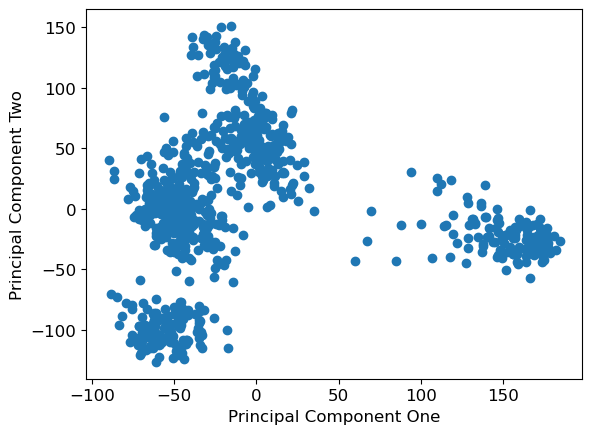

In [62]:
# Your code

# 1.A
# Create PCA with two principal components
pca_cancer = PCA(n_components=2)
# Fit and transform data
pca_cancer_data = pca_cancer.fit_transform(df)

# 1.B
print("The first two components explains %.2f%% of the variance in the data." % (np.sum(pca_cancer.explained_variance_ratio_)*100))

# 1.C
plt.scatter(pca_cancer_data[:,0], pca_cancer_data[:,1])
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")

2. What are the pros and cons of clustering the points in the PCA space rather than the original space? Give one reason for each. (6 points)

> **Your answer**:
>One pro of clustering points in PCA space is that you can reduce the dimensionality of the data. This reduces the noise in the data.
>One con of clustering points in PCA space is that some information is lost when you reduce the dimensionality of the data. This can cause our data to be oversimplified.

3. 1. Cluster the points in the PCA space using the K-means clustering algorithm. Choose the value for K you think is the best. (5 points)
   2. Re-do the scatter plot from Question 1.C and color the points according to the assigned clusters. (3 points)

c:\Users\2022m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<function matplotlib.pyplot.show(close=None, block=None)>

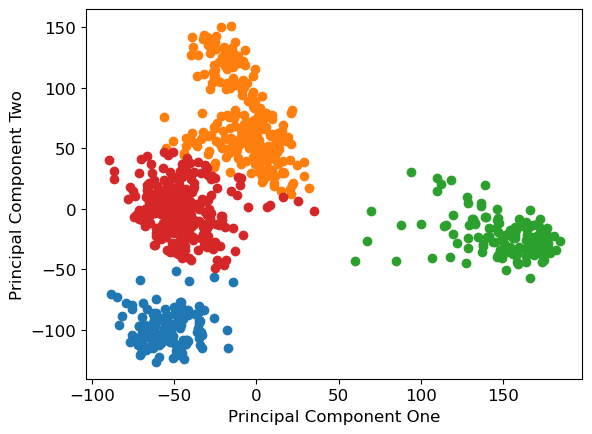

In [63]:
# Your code
from sklearn.cluster import KMeans
# Cluster data in PCA space
kmeans = KMeans(n_clusters=4)
predicted_labels = kmeans.fit_predict(pca_cancer_data)
# Plot clusters
for clusters in range(0, 4):
    # Filter the points so that you can only points for one cluster
    filtered_label = pca_cancer_data[predicted_labels == clusters]
    # Plot points onto graph
    plt.scatter(filtered_label[:,0], filtered_label[:,1])
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")
plt.show    

4. 1. We want to find the best K for this clustering problem by looking at the inertia. Plot the inertia as a function of K for K from 2 to 10 (step = 1). (8 points)
   2. What would be the ideal number of clusters? Explain. (6 points)

c:\Users\2022m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\2022m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\2022m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\2022m\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

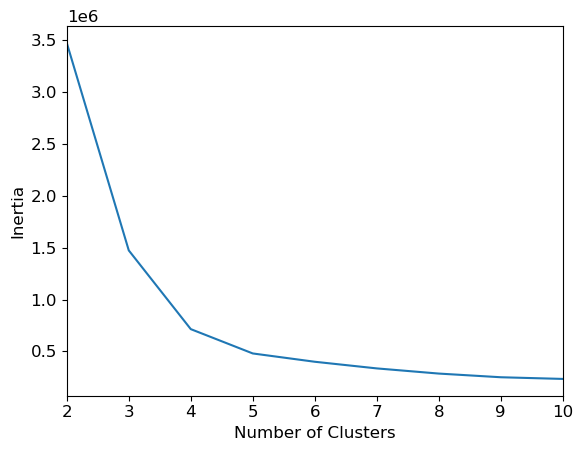

In [64]:
# Your code (4.A)
# Create a list that contains the number of clusters we want to test
cluster_list = np.arange(2,11)
# Create a list to contain all the inertia values for the clusters
inertia_list = [None, None] # No clusters for 0 and 1
for cluster_amount in cluster_list:
    # Create as many clusters as needed
    kmeans_optimal_testing = KMeans(n_clusters=cluster_amount)
    kmeans_optimal_testing.fit_predict(pca_cancer_data)
    inertia_list.append(kmeans_optimal_testing.inertia_)
# Plot data
plt.xlim(2,10)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.plot(inertia_list)

>**Your answer (4.B)**: 
>The ideal number of clusters is five. This is because when the number of clusters is five, adding more clusters does not significantly improve the inertia. I also determined five to be the ideal number of clusters by using the elbow method.

5. One advantage of DBSCAN is that it doesn't require a number of clusters. Instead, it uses other hyperparameters that will indirectly control for it. 
    1. Describe the two main hyperparameters of DBSCAN and their impact on clustering. (7 points)
    2. Cluster the points (in the PCA space) with DBSCAN, and select the values for the two main hyperparameters that will provide between 3 and 6 clusters. (6 points)
    3. Re-do the scatter plot from Question 1.C and color the points using the DBSCAN clusters. (2 points)

> **Your answer (5.A)**:
> The two main hyperparameters of DBSCAN are 'eps' (epsilon) and 'min_samples'. Epsilon is the maximum distance two points can be from each other to be considered neighbors. Min_samples is the number of samples needed for a point to be considered a core point.

Text(0, 0.5, 'Principal Component Two')

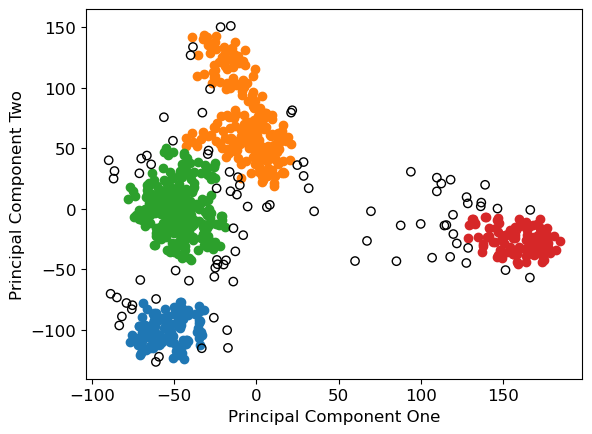

In [65]:
# Your code (5.B and 5.C)
from sklearn.cluster import DBSCAN
# 3-6 clusters
dbscan_cluster = DBSCAN(eps=8, min_samples=6)
dbscan_label = dbscan_cluster.fit_predict(pca_cancer_data)
# List containing the 3-6 clusters
cluster_amount_DB = np.arange(0,np.max(dbscan_label))
for cluster in cluster_amount_DB:
    # Filter for points only in clusters
    filter_DBSCAN = pca_cancer_data[dbscan_label == cluster]
    # Plot the points
    plt.scatter(filter_DBSCAN[:,0], filter_DBSCAN[:,1])
# Plot outliers
filter_outlier_DB = pca_cancer_data[dbscan_label == -1]
plt.scatter(filter_outlier_DB[:,0], filter_outlier_DB[:,1], facecolors='none', edgecolors='black')  
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")  

We found the true labels for this dataset. Let's first load them into the "true_labels" variable.

In [66]:
true_labels = pd.read_csv("data/tcga_labels.csv", index_col=0).Class

6. We want to compare the clustering results from K-means with the best K and for the true labels. 
    1. Redo the plot from Question 3, but color the points with the true labels and add a legend with the true class labels. (3 points)
    2. How can you evaluate the effectiveness of K-means clustering to retrieve the true labels? Review the scikit-learn's metrics module for measuring the similarity between two clusterings (the predicted and true clusterings), and briefly explain the approach. (There are multiple possible answers.) (6 points)

Text(0, 0.5, 'Principal Component Two')

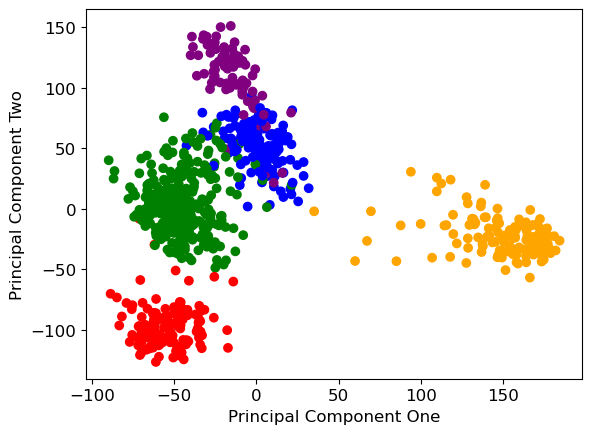

In [67]:
# Your code (6.A)
# Get the unique labels
unique_labels = []
for labels in true_labels:
    if labels not in unique_labels:
        unique_labels.append(labels)
# Create a list that relates the true labels and the colors
unique_labels_colors = []
for true_label in true_labels:
    if true_label == unique_labels[0]:
        unique_labels_colors.append("red")
    elif true_label == unique_labels[1]:
        unique_labels_colors.append("blue")
    elif true_label == unique_labels[2]:
        unique_labels_colors.append("green")
    elif true_label == unique_labels[3]:
        unique_labels_colors.append("orange")
    elif true_label == unique_labels[4]:
        unique_labels_colors.append("purple")    
# Plot graph
plt.scatter(pca_cancer_data[:,0], pca_cancer_data[:,1], c=unique_labels_colors)
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")  

> **Your answer (6.B)**: 

One way that we could evaluate the effectivness of K-means clustering could be to use the rand_score function from 'sklearn.metrics'. This function would give you the ratio of correctly clustered pairs over the total number of pairs. We could use the fowlkes_mallows_score fucntion to also look at both precision and recall between the predicted clusters, and the true clusters.

We could also use the completeness_score function from 'sklearn.metrics'. This function would be used to find if the data points in a cluster are predicted to be in the same cluster. On the other hand, we could use the homogeneity_score function which would see if predicted clusters would only contain data points from a single class. We could also combine both the homogeneity and completeness function, by using the 'v_measure_score' function, which would give us a good representation on how well our data is clustered, similar to the f1 score. 